In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [359]:
train = pd.read_csv("House_train.csv")

In [360]:
train = train[(train.GrLivArea < 4600)]

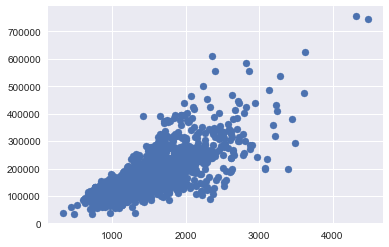

In [347]:
plt.scatter(y = train.SalePrice, x= train.GrLivArea)

In [369]:
names= train.drop(features_todrop, axis = 1).drop(["SalePrice", "Id"], axis = 1).columns

In [373]:
y = train.SalePrice.values
#X = train.drop(features_todrop, axis = 1).drop(["SalePrice", "Id"], axis = 1).values
#X = train.drop(["SalePrice", "Id"], axis = 1).values
X = train[['GrLivArea', 'OverallQual']].values

In [117]:
from math import log10
train.SalePrice = train.SalePrice.apply(lambda x: log10(x))

In [374]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear regression

In [375]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [376]:
y_pred = regressor.predict(X_test)

In [377]:
y_pred1 = []
for i in y_pred:
    y_pred1.append(round(float(i),0))

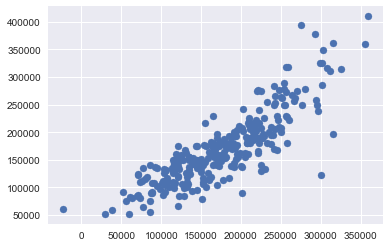

In [378]:
plt.scatter(y_pred1, y_test)

In [379]:
residuals = np.array(y_pred1) - y_test

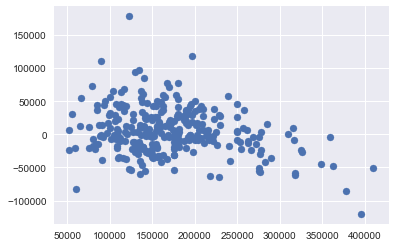

In [380]:
plt.scatter(y_test, residuals)

In [381]:
from sklearn.metrics import r2_score

In [382]:
r2_score(y_test, y_pred1) 

0.68468274421891362

In [383]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

35567.88004822235

# Random Forest

In [384]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(X, y)
# Predicting a new result
y_pred = regressor.predict(X_test)

In [385]:
residuals = (np.array(y_pred) - y_test)

In [386]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

17201.524328478878

In [387]:
r2_score(y_test, y_pred) 

0.92624945699140915

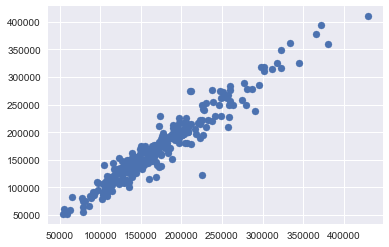

In [388]:
plt.scatter(y_pred, y_test)

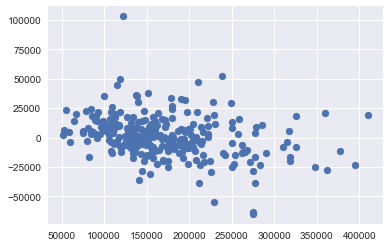

In [389]:
plt.scatter(y_test, residuals)

In [354]:
marks = train.drop(['SalePrice', "Id"], axis = 1).columns.tolist()

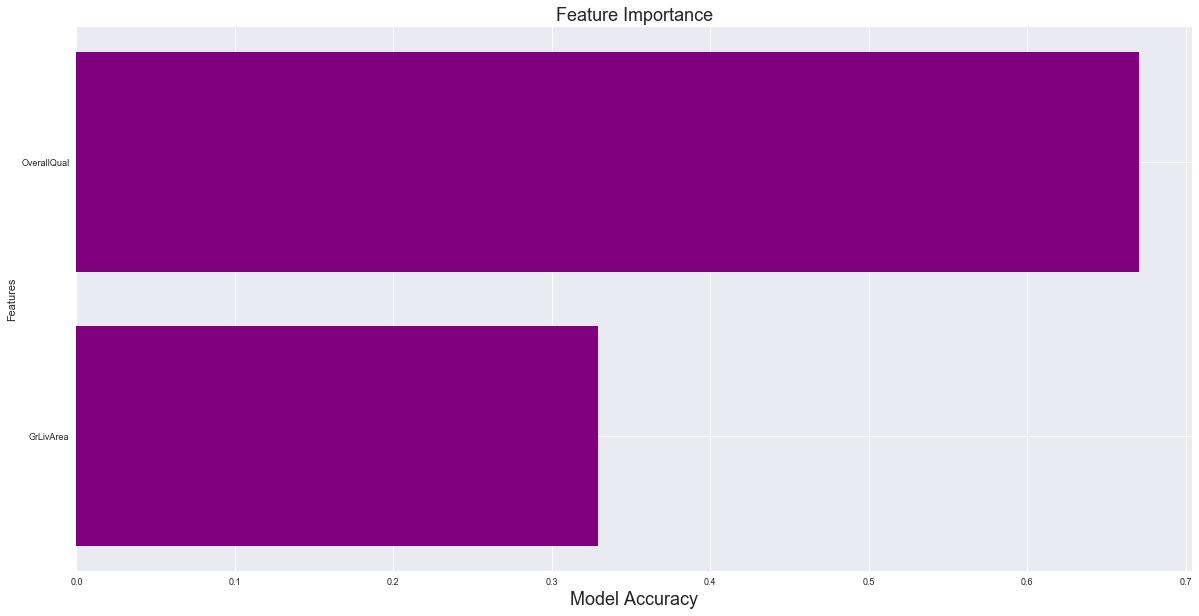

In [370]:
importance = regressor.feature_importances_
imp = importance
pos = np.arange(len(imp))
plt.figure(figsize=(20,10))
plt.barh(pos, imp, align='center', color = 'purple')
plt.title("Feature Importance", fontsize = 18)
plt.xlabel("Model Accuracy", fontsize = 18)
plt.ylabel("Features")
plt.yticks(pos, names)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True)

In [372]:
features_f = pd.DataFrame(importance, names).reset_index()
features_f.columns = ['Features', 'Score']
#features_todrop = features_f[features_f['Score'] < 0.1]['Features'].tolist()
#features_f.sort_values(by='Score', ascending=False)
#len(features_todrop)
features_f

,Features,Score
0,GrLivArea,0.329224
1,OverallQual,0.670776


# prediction of test set

In [390]:
test = pd.read_csv("House_test.csv")
#X_predict = test.drop(features_todrop, axis = 1).drop(["SalePrice", "Id"], axis = 1).values
X_predict = test[['GrLivArea', 'OverallQual']]

In [391]:
y_pred = regressor.predict(X_predict)

In [392]:
len(y_pred)

1459

In [393]:
pred = pd.DataFrame(test.Id, columns=['Id', 'SalePrice'])

In [394]:
pred.SalePrice = y_pred
pred.SalePrice = pred.SalePrice.apply(lambda x: round(x,1))

In [395]:
pred.to_csv("Houses_prediction.csv", index = False)

In [396]:
pred

,Id,SalePrice
0,1461,131115.9
1,1462,150244.4
2,1463,154733.3
3,1464,181566.7
4,1465,226300.0
5,1466,206333.3
6,1467,147554.4
7,1468,155244.4
8,1469,184262.7
9,1470,108351.7
